# Entregable 3

**Autor**: Sergio Rodríguez Calvo

In [1]:
from IPython.display import Image
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

## Ejercicio 1. Umbralización

El método de Otsu busca que la varianza que se produce en los niveles de gris de cada una de las clases en la que estamos separando los píxeles sea mínima, o todo lo mínima que sea posible.

Hemos elegido la siguiente imagen:

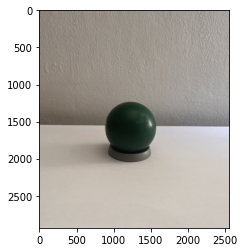

In [2]:
gbr_img = cv.imread('otsu_img_ej1.jpg',1)
rgb_img = cv.cvtColor(gbr_img, cv.COLOR_BGR2RGB)
pixels = np.array(rgb_img)
plt.imshow(pixels)

Lo pasamos a escala de grises de acuerdo con lo que se pide.

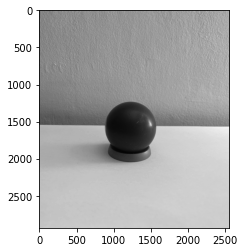

In [3]:
gray_img = cv.cvtColor(gbr_img, cv.COLOR_RGB2GRAY);
plt.imshow(gray_img, cmap='gray')

Vamos a aplicar el método de Otsu.

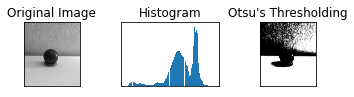

In [4]:
# Let's copy and rename the image
img = gray_img.copy()

# Otsu's thresholding
ret,th = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(3,3,1),plt.imshow(img,'gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.hist(img.ravel(),256)
plt.title("Histogram"), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(th,'gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])
plt.show()

El método de Otsu calcula el umbral de forma no arbitraria o, dicho de otro modo, de forma automática, en función de los pesos, la media y la varianza, intentando que la dispersión dentro de cada clase sea la menor posible.

El umbral que ha calculado es el siguiente:

In [5]:
print("El umbral calculado mediante Otsu es {:.2f}".format(ret))

El umbral calculado mediante Otsu es 149.00


Como vemos, no hemos obtenido un umbral en el valle entre los dos "monticulos" del histograma, algo que hemos visto en la teoría.

Ahora, vamos a mostrar la imagen umbralizada mediante Otsu para que se aprecie mejor el resultado.

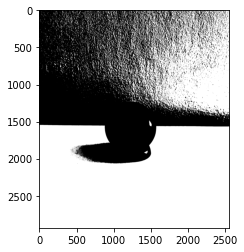

In [6]:
plt.imshow(th, cmap='gray')

Si sumamos a todos los píxeles una misma cantidad a sus niveles de gris, intentando no saturar en la medida de lo posible, el umbral debería aumentar más o menos en la misma proporción.

Veamos esto con un ejemplo, donde vamos a sumar `25` al nivel de gris de todos los píxeles, mostrando la diferencia (una imagen más clara), y a realizar el mismo proceso de umbralización de Otsu.

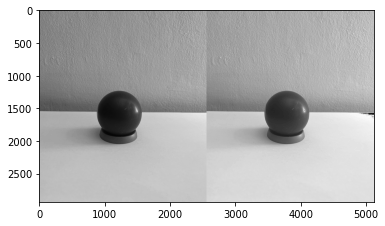

In [7]:
img2 = np.clip(img + 25, 0, 255) # np.clip para evitar tener niveles de grises fuera del rango [0, 256)
concated = cv.hconcat([img,img2])
plt.imshow(concated, cmap='gray')

Aplicamos Otsu de nuevo:

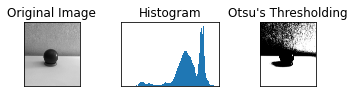

In [8]:
# Otsu's thresholding
ret1,th1 = cv.threshold(img2,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.subplot(3,3,1),plt.imshow(img,'gray')
plt.title("Original Image"), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,2),plt.hist(img2.ravel(),256)
plt.title("Histogram"), plt.xticks([]), plt.yticks([])
plt.subplot(3,3,3),plt.imshow(th1,'gray')
plt.title("Otsu's Thresholding"), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
print("Ahora, el umbral de Otsu es {:.2f}".format(ret1))
print("La diferencia entre ambos umbrales es {:.2f}".format(abs(ret1-ret)))

Ahora, el umbral de Otsu es 173.00
La diferencia entre ambos umbrales es 24.00


Hemos obtenido un umbral que se ha desplazado en la misma proporción, más o menos, en que hemos aumentado los niveles de gris de los píxeles. Hay que tener en cuenta que si se satura, es decir, nos pasamos de 255 y convertimos todos esos píxeles a 255 para no estar fuera de rango, el umbral no se desplazará de la forma que hemos comentado, ya que hemos alterado los pesos de cada nivel de gris.

Finalmente, vamos a explicar en que consisten las técnicas de umbral adaptativo, de media y gaussiano, cómo las implementa OpenCV y las vamos a aplicar ajustando los parámetros.

El umbral adaptativo es util cuando se tiene una iluminación deficiente o desigual en la imagen. Se realizan particiones de la imagen y se selecciona un umbral diferente en cada parte. Existen dos métodos:

* Media: calculamos la media de los píxeles en función de un vecindario cuadrado.
* Gaussiano: calculamos la media de los píxeles en función de un vecindario de tipo gaussiano.

Tenemos que indicar el tamaño de la subregión o vecindario (por ejemplo, dado un valor 5, el vecindario será 5 x 5), por lo que cuanto más grande más vecindario tenemos en cuenta y corremos el riesgo de emborronamiento y, además, tenemos que indicar un valor `C` para ajustar el método ya que en algunas circustancias no se discrimina bien entre el objeto y el fondo.

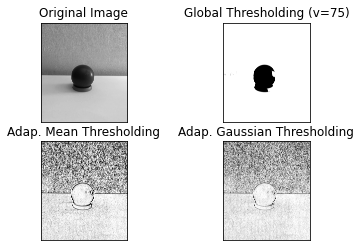

In [10]:
ret,th2 = cv.threshold(img,75,255,cv.THRESH_BINARY)
th_mean = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,31,3)
th_gaussian = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,31,3)

plt.subplot(2,2,1),plt.imshow(img,'gray')
plt.title("Original Image")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,2),plt.imshow(th2,'gray')
plt.title("Global Thresholding (v=75)")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,3),plt.imshow(th_mean,'gray')
plt.title("Adap. Mean Thresholding")
plt.xticks([]),plt.yticks([])
plt.subplot(2,2,4),plt.imshow(th_gaussian,'gray')
plt.title("Adap. Gaussian Thresholding")
plt.xticks([]),plt.yticks([])
plt.show()

Hemos elegido un vecindario grande ya que tenemos una imagen muy homogénea. Además, hemos añadido un valor `C = 3` para poder distinguir bien el objeto del fondo. 

Vemos como en la umbralización adaptativa se aprecian mejor las diferentes regiones (pared, mesa y bola). Las líneas quedan más marcadas en el de tipo media, el cual introduce algo de más ruido (en cierto modo, se aprecia el tipo de ventana o vecindario usado), sin embargo, obtenemos una imagen con algo menos de ruido en el de tipo gaussiano siendo el resultado más natural, pero apreciandose menos los detalles (los bordes, en este caso).

## Ejercicio 2. Canny 

La función de Canny implementada en OpenCV tiene la siguiente definición: `cv2.Canny(image, threshold1, threshold2, apertureSize, L2gradient)`, donde los parámetros `image`, `threshold1` y `threshold2` son obligatorios y, el resto, opcionales. Vamos a explicar cada uno de ellos:
* `image`: un array de n-dimensiones con la imagen.
* `threshold1`: es el valor de umbral alto del gradiente de intensidad.
* `threshold2`: es el valor de umbral bajo del gradiente de intensidad.
* `apertureSize`: tamaño de la matriz (apertureSize x apertureSize) para el filtro de Sobel. Su valor por defecto es 3 y su valor debe ser 3, 5 o 7. Se utiliza para encontrar gradientes en la imagen, mediante una suavización para agudizar la imagen.
* `L2gradient`: especifica la ecuación para encontrar la magnitud del gradiente. Es de tipo booleano y su valor predeterminado es `False`.

`threshold1` y `threshold2` se utilizan para la doble umbralización que se realiza en el paso 4 del algoritmo. Es decir, `threshold1` permite obtener los píxeles semilla, aquellos que superan el umbral y se consideran píxeles conectados aquellos que superen el segundo umbral o `threshold2`.

La imagen es una foto tomada sobre la impresión de un sudoku. Notese que debido a la impresión hay unas líneas alrededor del sudoku que podrían ser detectadas como líneas.

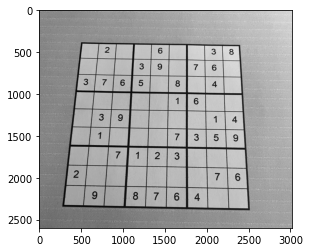

In [11]:
sudoku_img = cv.imread('sudoku_ej2.jpg',0)
plt.imshow(sudoku_img, cmap='gray')


Aunque no se pide, vamos a aprovechar esta circustancia para eliminar un poco de ruido y, de paso, poder eliminar esas líneas del fondo utilizando un filtro gaussiano, tal y como hemos visto en la teoría.

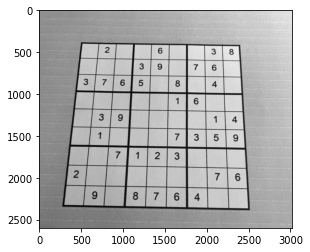

In [12]:
blur = cv.GaussianBlur(sudoku_img,(25,25),2)
plt.imshow(blur, cmap='gray')

Hemos utilizado una ventana 25 x 25 y sigma 2, que si bien va a emborronar un poco la imagen, vamos a obtener mejor resultado en los bordes que con un sigma más alto.

Ahora, aplicamos Canny:

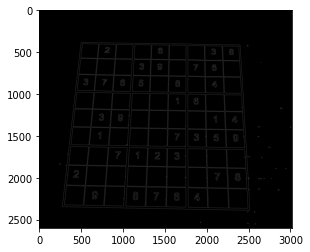

In [13]:
edges = cv.Canny(blur,50,150)
plt.imshow(edges, cmap='gray')

Con los parámetros 50 y 150 para los umbrales, conseguimos seleccionar sólo los bordes ya que existe una diferencia suficiente entre ellos para detectar sólo los bordes, evitando llevarnos ruido, entre otros, el del fondo debido a la impresión de la imagen.

## Ejercicio 3. Hough

La transformada de Hough se usa para detectar líneas rectas, partiendo de lo obtenido en el ejercicio al anterior, como en este caso, el método de Canny para extraer los bordes. En OpenCV la función para la transformada de Hough tiene la siguiente definición `cv.HoughLines(image, rho, theta, threshold)`, y cuyos parámetros se describen a continuación:
* `image`: un array de n-dimensiones con la imagen, en este caso, la salida del método de Canny, ya que contiene una imagen con los bordes.
* `rho`: la precisión del parámetro rho, en este caso, la distancia al origen dentro del plano XY que representa a la recta de la imagen.
* `theta`: la precisión del parámetro theta, en este caso, el ángulo de la recta rho del plano XY que representa a la recta de la imagen.
* `threshold`: es el umbral utilizado para definir el voto mínimo que se debe obtener para ser considerado como una línea. El número de votos depende del número de puntos en la línea, por tanto, representa la longitud mínima de línea que debe detectarse.

En la teoría hemos visto como cualquier recta puede ser representada en el plano XY a traves de los parámetros rho y theta, que como se ha descrito preciamente, corresponden a la distancia al origen y el ángulo de rho respecto al eje X en el plano XY.

La función `cv.HoughLines` devuelve un array que almacena los vectores de los parámetros (rho, theta) de las líneas de la imagen. En este caso, `rho` se mide en píxeles y `theta` en radianes.

A continuación, vamos a detectar las líneas sobre la imagen del sudoku:

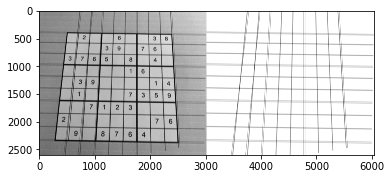

In [14]:
# Let's copy the original image
img = sudoku_img.copy()

# Let's create a image with same dimension than the original one and let's draw in white
white_img = img.copy()
white_img.fill(255)

lines = cv.HoughLines(edges,1,np.pi/180,220)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + img.shape[1]*(-b))
    y1 = int(y0 + img.shape[0]*(a))
    x2 = int(x0 - img.shape[1]*(-b))
    y2 = int(y0 - img.shape[0]*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    cv.line(white_img,(x1,y1),(x2,y2),(0,0,255),2)

concated = cv.hconcat([img,white_img])
plt.imshow(concated, cmap='gray')

Hemos mostrado las líneas sobre la imagen original y, justo al lado, hemos concatenado esas mismas líneas sobre una imagen en blanco para apreciarlas mejor.

Finalmente, vamos a tomar una nueva imagen de un sudoku bien encuadrado, sin inclinación, con otros objetos que generen bordes.

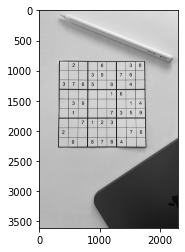

In [15]:
sudoku_img2 = cv.imread('sudoku_ej3.jpg',0)
plt.imshow(sudoku_img2, cmap='gray')

Vamos a obtener las líneas y a mostrarlas sobre la imagen original y, además, sobre una imagen en blanco concatenada a la original para apreciar mejor las líneas.

(3610, 2304)


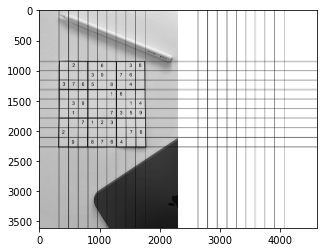

In [16]:
# Let's copy the original image
img = sudoku_img2.copy()

# Let's create a image with same dimension than the original one and let's draw in white
white_img = img.copy()
white_img.fill(255)

edges = cv.Canny(img,50,200)

lines = cv.HoughLines(edges,1,np.pi/30,200)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + img.shape[1] *(-b))
    y1 = int(y0 + img.shape[0]*(a))
    x2 = int(x0 - img.shape[1]*(-b))
    y2 = int(y0 - img.shape[0]*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
    cv.line(white_img,(x1,y1),(x2,y2),(0,0,255),2)

print(img.shape)

concated = cv.hconcat([img,white_img])
plt.imshow(concated, cmap='gray')

Estamos trabajando sobre el plano _rho-theta_, es decir, las rectas están definidas en el espacio paramétrico que estamos trabajando como un punto, hemos modificado el parámetro `theta` que en el que podemos indicar qué ángulos estamos buscando. Eso nos va a devolver las líneas que cumplen con esos parámetros, en este caso, queremos las líneas que tengan 0º (horizontales) y +/- 90º (verticales).

Con el parámetro `threshold`, definimos un umbral para el mínimo de votos, dejando fuera aquellas líneas que en la "votación" (de acuerdo con el algoritmo visto en la teoría) no han llegado al mínimo.

## Ejercicio 4. K-medias

Vamos a cargar la imagen elegida para este ejercicio y a mostrarla.

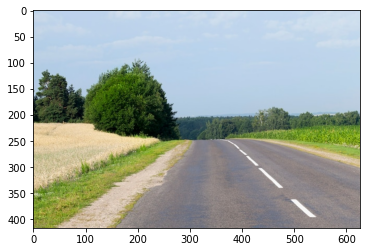

In [17]:
gbr_img = cv.imread('paisaje_ej4.jpg',1)
rgb_img = cv.cvtColor(gbr_img, cv.COLOR_BGR2RGB)
pixels = np.array(rgb_img)
plt.imshow(pixels)

En OpenCV, el método `cv.kmeans` tiene los siguientes parámetros:
* `samples`: es un array de tipo `np.float32`, donde cada característica es una columna del array.
* `K`: el número de clusteres requeridos al final.
* `criteria`: condición de parada una vez se satisfaga el criterio. Consiste en una tipla de tres parámetros, el primero es el tipo de terminación, con tres opciones, cuando se consigue la precisión deseada; cuando se alcanza un número máximo de iteraciones; y si se cumple una de las condiciones anteriores. El segundo parámetro es el número máximo de iteraciones a realizar. Y, el tercer parámetro, es la precisión (_epsilon_) que queremos obtener.
* `attemps`: numero de veces que se ejecuta el algoritmo utilizando diferentes etiquetas (o centroides) iniciales.
* `flags`: para indicar cómo se toman los centroides iniciales. Se suele seleccionar de forma aleatoria en cada intento.

La salida del método `cv.kmeans` es triple. En primer lugar obtenemos la suma de las distancias al cuadrado de cada punto a sus correspondientes centroides. En segundo lugar, las distintas etiquetas con las se marcan los elementos. Y, finalmente, un array con los centros de los clusteres.

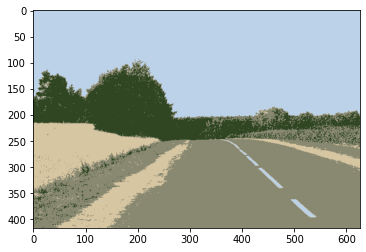

In [18]:
img = gbr_img.copy()

Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

rgb_img = cv.cvtColor(res2, cv.COLOR_BGR2RGB)
pixels = np.array(rgb_img)
plt.imshow(pixels)

Vamos a realizar ahora el mismo ejercicio pero usando un modelo de color diferente. Por defecto, trabajamos en RGB (o BGR en OpenCV), por lo que el color está codificado utilizando tres canales. En algunas situaciones, es útil utilizar un modelo de color diferente, como por ejemplo, HSV. En HSV el color queda codificado en sólo un canal (el canal H), por lo que, como tenemos todos los colores en un rango entre 0 y 360, a la hora de umbralizar o segmentar, basta con encontrar un par de umbrales que limiten el color que queremos tanto para valores mínimos y máximos.

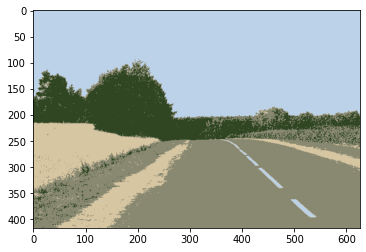

In [19]:
img = gbr_img.copy()

img = cv.cvtColor(img,cv.COLOR_BGR2HSV) # Convertimos a HSV y renombramos la variable img

Z = img.reshape((-1,3))

# convert to np.float32
Z = np.float32(Z)

# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 4
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))

new_image = cv.cvtColor(res2, cv.COLOR_HSV2RGB) # Convertimos a RGB para poder mostrar el resultado usando matplotlib
pixels = np.array(rgb_img)
plt.imshow(pixels)

## Ejercicio 5. Morfología

Vamos a cargar y mostrar la imagen.

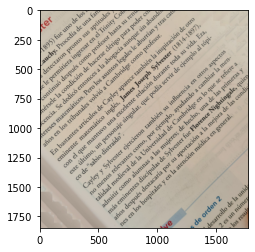

In [20]:
gbr_img = cv.imread('E3-5.jpg',1)
rgb_img = cv.cvtColor(gbr_img, cv.COLOR_BGR2RGB)
pixels = np.array(rgb_img)
plt.imshow(pixels)

La imagen es una fotografía de un texto inclinado unos -45º aproximadamente. Vamos a pasarla a escala de grises para preparar la imagen para el ejercicio.

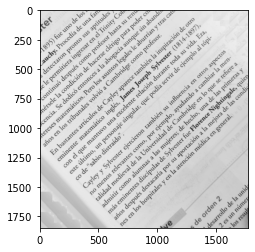

In [21]:
gray_img = cv.cvtColor(gbr_img, cv.COLOR_RGB2GRAY);
plt.imshow(gray_img, cmap='gray')

Una vez tenemos la imagen en escala de grises, vamos a aplicar un filtro gaussiano para eliminar el ruido.

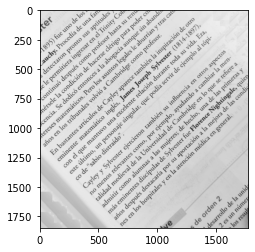

In [22]:
blur = cv.GaussianBlur(gray_img,(3,3),1)
plt.imshow(gray_img, cmap='gray')

Una vez eliminado el ruido, vamos a binarizar la imagen, para quedarnos sólo con el texto.

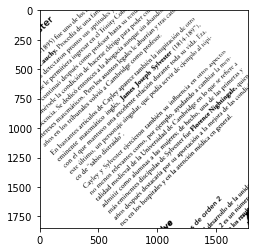

In [23]:
th, ret = cv.threshold(blur, 120, 255, cv.THRESH_BINARY)
plt.imshow(ret, cmap='gray')

Vamos ahora a invertir los colores, ya que la dilatación, que es la operación que vamos a realizar, se hace sobre los objetos en blanco, y lo que queremos dilatar es el texto, que originalmente está en negro.

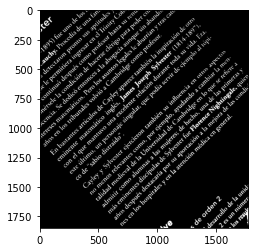

In [24]:
img = (255-ret)
plt.imshow(img, cmap='gray')

Ahora tenemos que definir un kernel o una forma, que vamos a utilizar para realizar la dilatación. Vamos a definir un objeto diagonal (inclinado igual que la imagen) y sin puntas, para obtener bordes rectos y de 90 grados.

In [26]:
size = 5
kernel = np.zeros((size, size), np.uint8)
i,j = 0,size-1
while i < size and j >= 0:
    kernel[i][j] = 1
    i += 1
    j -= 1

kernel[0,4] = 0
kernel[4,0] = 0
print(kernel)

[[0 0 0 0 0]
 [0 0 0 1 0]
 [0 0 1 0 0]
 [0 1 0 0 0]
 [0 0 0 0 0]]


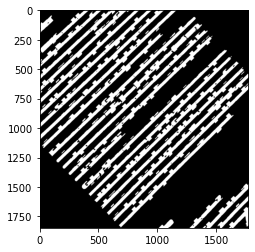

In [27]:
dilation = cv.dilate(img,kernel,iterations = 11)

plt.imshow(dilation, cmap='gray')

Tras aplicar la dilatación, nos hemos aproximado a los que buscamos. Pero, parece que aún no se aprecia el efecto de marcador que buscamos en algunos puntos, presentandose huecos y discontinuidades. Por ello, vamos a aplicar el mismo efecto en la diagonal contraria, con el mismo kernel pero rotado 90 grados.

In [28]:
size = 5
kernel = np.zeros((size, size), np.uint8)
i,j = 0,0
while i < size and j < size:
    kernel[i][j] = 1
    i += 1
    j += 1

kernel[0][0] = 0
kernel[4][4] = 0

print(kernel)

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]


Aplicamos de nuevo la dilatación:

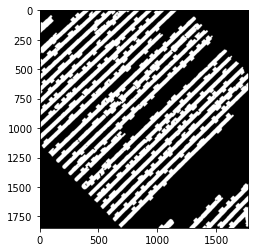

In [29]:
dilation = cv.dilate(dilation,kernel,iterations = 3)

plt.imshow(dilation, cmap='gray')

Ahora, hemos conseguido mejorar el resultado. Vamos a realizar el proceso de invertir colores para dejarlo como en origen.

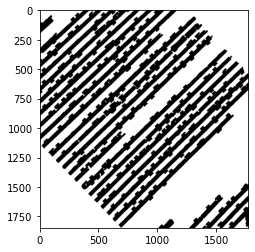

In [30]:
final = (255-dilation)
plt.imshow(final, cmap='gray')

## Referencias

* [(Ejercicio 1) Image Thresholding](https://docs.opencv.org/4.1.0/d7/d4d/tutorial_py_thresholding.html) 
* [(Ejercicio 1) AdaptiveThresholdTypes in OpenCV Docs](https://docs.opencv.org/4.1.0/d7/d1b/group__imgproc__misc.html#ggaa42a3e6ef26247da787bf34030ed772cad0c5199ae8637a6b195062fea4789fa9)
* [(Ejercicio 1) Adaptive Thresholding with OpenCV](https://pyimagesearch.com/2021/05/12/adaptive-thresholding-with-opencv-cv2-adaptivethreshold/)
* [(Ejercicio 2) Canny Edge Detection](https://docs.opencv.org/4.1.0/da/d22/tutorial_py_canny.html)
* [(Ejercicio 2) Python | cv2 Canny() Method](https://java2blog.com/cv2-canny-python/)
* [(Ejercicio 2) Canny Edge Detector](https://docs.opencv.org/3.4/da/d5c/tutorial_canny_detector.html)
* [(Ejercicio 3) Hough Line Transform](https://docs.opencv.org/4.1.0/d6/d10/tutorial_py_houghlines.html)
* [(Ejercicio 3) Feature Detection: Hough](https://docs.opencv.org/2.4/modules/imgproc/doc/feature_detection.html#houghlines)
* [(Ejercicio 4) Understanding K-Means Clustering](https://docs.opencv.org/4.1.0/de/d4d/tutorial_py_kmeans_understanding.html)
* [(Ejercicio 4) K-Means Clustering in OpenCV](https://docs.opencv.org/4.1.0/d1/d5c/tutorial_py_kmeans_opencv.html)
* [(Ejercicio 4) Using Python and k-means in HSV color space to find dominant colors in images](https://giusedroid.blogspot.com/2015/04/using-python-and-k-means-in-hsv-color.html)
* [(Ejercicio 4) HSV color model](https://medium.com/neurosapiens/segmentation-and-classification-with-hsv-8f2406c62b39)
* [(Ejercicio 5) Morphological Transformations](https://docs.opencv.org/4.1.0/d9/d61/tutorial_py_morphological_ops.html)